<a href="https://colab.research.google.com/github/bdfd/Section6.Project02-Telco_Customer_Churning_Prediction/blob/main/2.0%20colab/Telco_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Startup Profit Prediction

## Exploratory Data Analysis

The Background Introduction  
Churn is a one of the biggest problem in  the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%.   

The Approach  
1. Perform some quick EDA(Exploratory Data Analysis)
2. Feature Engineering
3. Data Cleaning
4. Encoding, Scaling and Preprocessing
5. Traning Machine Learning Models
5. Cross Validation and Ensembling Predictions

Prediction Used Model:
  *   1. Multivariate Linear Regression

Target Cluster Datasets is about a set of data regarding about profit based on  following fields.  

Analyze information  
1 binary features: gender  
7 non-binary categorical features: cnt_children, name_income_type,name_education_type, name_family_status, name_housing_type, occupation_type, cnt_fam_members  
3 continuous features: amt_income_type, days_birth, days_employed  
1 constant feature: flag_mobil  
1 possible drop feature: UserID
1 target variable: Purchased

In [ ]:
# import from google colab
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground
!pip install -r requirements.txt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground


In [ ]:
#Code to verify the package installation
try:
  import tqdm
  print('package is installed.')
except:
  print('Package not found')

package is installed.


In [ ]:
# Configuration Setting
# from google.colab import data_table
# data_table.enable_dataframe_formatter()

In [ ]:
# Import necessary packages
import warnings
warnings.filterwarnings('ignore')
import execdata as exe
import pickle
import time
from rich.progress import track

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline
sns.set(style='darkgrid', font_scale=1.4)

#Scikit-Learn Fundamental Packages
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
# from sklearn.metrics import roc_auc_score,roc_curve, plot_roc_curve
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
for i in track(range(15), description="[green]Loading..."):
  time.sleep(1)

Output()

In [ ]:
root_dir = '/content/drive/MyDrive'
work_dir = '/content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground/2.0 Python Script'
data_path =f'{work_dir}/sample_data'
result_dir = f'{work_dir}/sample_result'

In [ ]:
import os
if not os.path.exists(data_path):
  os.mkdir(data_path)

In [ ]:
import os
if not os.path.exists(result_dir):
  os.mkdir(result_dir)

In [ ]:
%cd '{work_dir}'
!pwd

/content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground/2.0 Python Script
/content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground/2.0 Python Script


In [ ]:
# Alternative of Reading the dataset
# pwd = os.getcwd()
# data_dir = os.path.join(pwd, '50_Startups.csv')
# df = pd.read_csv(data_dir, encoding = 'utf-8')
# Read the dataset - switch to second link if first one not work, OP mean On Progressing
data_dir = 'https://raw.githubusercontent.com/bdfd/Project_03-Social_Network_Ads/main/dataset/'
dataset_url_1 = 'Social_Network_Ads.csv'
dataset_url_2 = 'Social_Network_Ads.csv'
# Upload dataset into data frame
df = pd.read_csv(os.path.join(data_dir,dataset_url_1), encoding = 'utf-8')
df2 = pd.read_csv(os.path.join(data_dir,dataset_url_2), encoding = 'utf-8')
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [ ]:
print(f'the dataset_1 size is {df.shape} and dataset_2 size is {df2.shape}')

the dataset_1 size is (400, 5) and dataset_2 size is (400, 5)


In [ ]:
# Check column name and categories
df.columns.values

array(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'],
      dtype=object)

In [ ]:
df.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [ ]:
# Find any missing or null value
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
# Varify the data type match with corresponding columns types
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
import table_nan_val as tnv

Your selected dataframe has 5 columns.
There are 0 columns that have missing values.


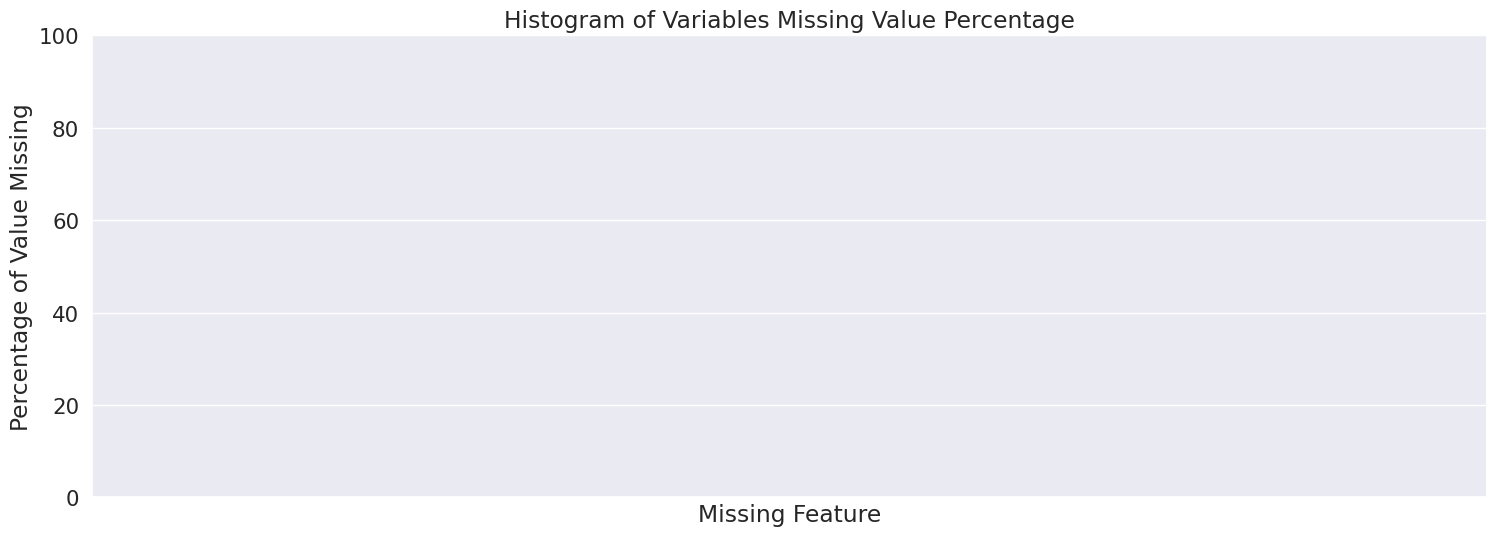

,index,Miss_Values,Miss_Rate,Available_Value


In [ ]:
tnv.Missing_Value_Analysis(df)

In [ ]:
print(f'Duplicates in this dataset frame: {df.iloc[:,1:].duplicated().sum()}, ({np.round(100*df.iloc[:,1:].duplicated().sum()/len(df),1)}%)')
print('')

Duplicates in this dataset frame: 20, (5.0%)



0    257
1    143
Name: Purchased, dtype: int64


<Axes: >

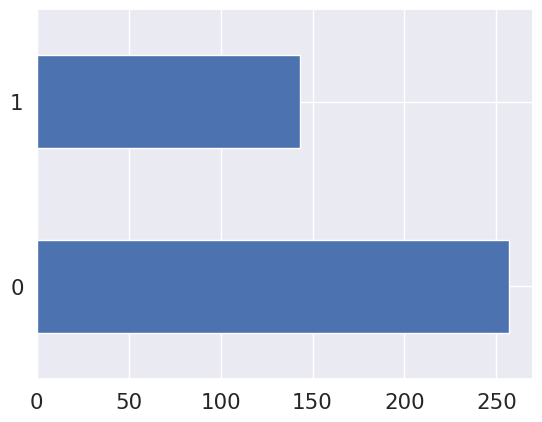

In [ ]:
print(df['Purchased'].value_counts())
df['Purchased'].value_counts().plot(kind='barh')

<Axes: xlabel='Purchased', ylabel='Density'>

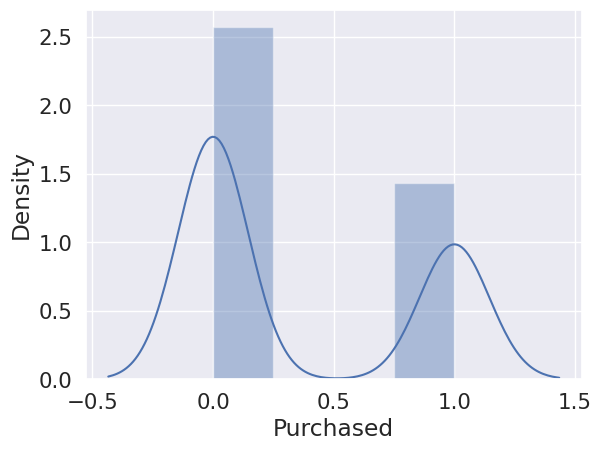

In [ ]:
sns.distplot(df['Purchased'])

In [ ]:
print(df['Purchased'].value_counts().to_frame())

   Purchased
0        257
1        143


In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## Data Cleansing

In [ ]:
#eac
df.reset_index(inplace=True)
# reset index column and deleting the first column(Original Index Column)
df = df.iloc[:, 1:]
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
# Analyze the cardinality of features
# array(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'],dtype=object)
# Number of float type[constant, continous], categorical type[binary, non-binary]
# 2 binary categorical features: Gender
# 2 continuous features: Age, EstimatedSalary
# 1 possible drop features: User ID
# Target Variable: Purchased(Binary Categorical Features)

In [ ]:
# Drop duplicates
# df=df.drop_duplicates(subset=df.columns[1:], keep='first')

In [ ]:
# # Alternative Choice - drop the rows with NA value or NA target variables
# # drop Null small amount in the datasets
# df = df.dropna(axis=0)
# print(df.shape)
# # we also drop the XXL record since we dont have a representative amount of this data
# df = df[df['size'] != 'XXL']
# print(df.shape)

In [ ]:
# # Fill missing values
# df['Column_Name'].fillna(value='Other', inplace=True)

In [ ]:
# df_target_variable = df['status']
# df = df.drop('status',axis=1)
# df = pd.get_dummies(df)
# df = pd.concat([df, df_target_variable], axis=1)
# df.head(3)

In [ ]:
# X = df.iloc[:,1:-1] # X value contains all the variables except labels -only if the prediction column is last one
# y = df.iloc[:,-1] # these are the labels
# df_train, df_test = exe.split(df)
# rewrite the target variable
target_variable = 'Purchased'
X_train, X_test, y_train, y_test = exe.sep_split(df, target_variable)
# we create the test train split first


In [ ]:
X_train

,User ID,Gender,Age,EstimatedSalary
117,15591433,Male,36,52000
129,15792102,Female,26,84000
11,15606274,Female,26,52000
277,15764604,Male,49,88000
200,15628523,Male,35,39000
...,...,...,...,...
122,15724423,Female,40,75000
51,15764195,Female,18,44000
119,15701962,Male,41,59000
316,15667417,Female,54,104000


In [ ]:
num_col = [col for col in X_train.columns if X_train[col].dtypes!='O']
num_col

['User ID', 'Age', 'EstimatedSalary']

In [ ]:
cat_col = [col for col in X_train.columns if X_train[col].dtypes=='O']
cat_col

['Gender']

In [ ]:
numeric_feature = exe.column_identify(df,num_col)
numeric_feature

{'User ID': 400, 'Age': 43, 'EstimatedSalary': 117}

In [ ]:
category_feature = exe.column_identify(df,cat_col)
category_feature

{'Gender': 2}

In [ ]:
X_train

,User ID,Gender,Age,EstimatedSalary
117,15591433,Male,36,52000
129,15792102,Female,26,84000
11,15606274,Female,26,52000
277,15764604,Male,49,88000
200,15628523,Male,35,39000
...,...,...,...,...
122,15724423,Female,40,75000
51,15764195,Female,18,44000
119,15701962,Male,41,59000
316,15667417,Female,54,104000


In [ ]:
X_test

,User ID,Gender,Age,EstimatedSalary
189,15715160,Male,28,32000
292,15625395,Male,55,39000
140,15807909,Male,19,85000
97,15582492,Male,28,123000
207,15794566,Female,52,114000
...,...,...,...,...
293,15760570,Male,37,77000
6,15598044,Female,27,84000
291,15596522,Male,49,89000
312,15733964,Female,38,50000


In [ ]:
# from sklearn.preprocessing import LabelEncoder
categorical_feature = ['Gender']
gender_ohe = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  gender_ohe,
                                  categorical_feature)],
                                  remainder='passthrough')
X_train = transformer.fit_transform(X_train)
X_test = transformer.fit_transform(X_test)
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,0.0,1.0,15591433.0,36.0,52000.0
1,1.0,0.0,15792102.0,26.0,84000.0
2,1.0,0.0,15606274.0,26.0,52000.0
3,0.0,1.0,15764604.0,49.0,88000.0
4,0.0,1.0,15628523.0,35.0,39000.0


In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [ ]:
# X_train

In [ ]:
# X_test

In [ ]:
# pd.DataFrame(X_train).to_csv('train_x.csv')
# pd.DataFrame(X_test).to_csv('test_x.csv')
# pd.DataFrame(y_train).to_csv('train_y.csv')
# pd.DataFrame(y_test).to_csv('test_y.csv')

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
knn_cm = confusion_matrix(y_test, y_pred)
print(knn_cm)

[[43  9]
 [11 17]]


In [ ]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# from sklearn.model_selection import GridSearchCV
k_range = range(1,31)
print(k_range)
weight_factor = ('uniform','distance')
param_grid = dict(n_neighbors=k_range, weights=weight_factor)
param_grid

range(1, 31)


{'n_neighbors': range(1, 31), 'weights': ('uniform', 'distance')}

In [ ]:
knn_grid_model = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy')

In [ ]:
knn_grid_model.fit(X_train, y_train)
knn_grid_model.best_params_
knn_grid_model.best_score_

0.7625

In [ ]:
rf_model = knn_grid_model.best_estimator_
rf_model

KNeighborsClassifier(n_neighbors=17)

In [ ]:
df = pd.DataFrame(knn_grid_model.cv_results_)
df = df.sort_values(['rank_test_score','mean_fit_time'])
df.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
32,0.002820,0.001923,0.016192,0.007835,17,uniform,"{'n_neighbors': 17, 'weights': 'uniform'}",0.75000,0.750,0.75000,0.78125,0.78125,0.71875,0.6875,0.71875,0.87500,0.81250,0.7625,0.050775,1
53,0.003793,0.002639,0.005617,0.003219,27,distance,"{'n_neighbors': 27, 'weights': 'distance'}",0.78125,0.625,0.75000,0.87500,0.81250,0.68750,0.7500,0.68750,0.87500,0.78125,0.7625,0.076801,1
35,0.004099,0.005197,0.005294,0.005153,18,distance,"{'n_neighbors': 18, 'weights': 'distance'}",0.78125,0.625,0.78125,0.81250,0.78125,0.68750,0.7500,0.71875,0.90625,0.78125,0.7625,0.071535,1


In [ ]:
# from sklearn.model_selection import cross_val_score
score1 = cross_val_score(knn_model,X_train, y_train, cv=5)
print("训练集上的平均精准度：%0.2f（+/-%0.2f）" % (score1.mean(),score1.std()*2))

训练集上的平均精准度：0.75（+/-0.09）
